# ¡Hola Andres! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

---

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Andres has realizado un trabajo exhaustivo y bien estructurado, abordando cada objetivo con metodología clara y reflexiones pertinentes. En la exploración inicial, identificaste datos limpios pero con observaciones relevantes. En la implementación de kNN, destacaste correctamente el impacto del escalado y el tipo de distancia en el rendimiento del modelo, validando su importancia práctica. Al transformar el problema a clasificación, lograste contrastar efectivamente el modelo kNN con un enfoque básico, reforzando la superioridad del primero con datos escalados. Aplicación de métricas de evaluación como RMSE, R² y el F1 score para validar la calidad de tus modelos refleja un rigor sobresaliente. Además aplicaste de manera correcta las operaciones algebraicas para transformar los datos y lograr hacer una comparativa en el rendimiento de la información original vs los datos ofuscados.
    
El análisis que incluiste en las diferentes secciones del proyecto le da valor a tu trabajo, y complementa notablemente tus habiliadades técnicas. Asegurate de incluir este tipo de análisis para cada elemento de información (tabla, gráficas, etc) que obtengas, de esta forma tus ideas y conclusiones estarán mejor justificadas. 

¡Te deseo mucho éxito en tu próximo Sprint! 🚀
 
*Estado del Proyecto*: **Aprobado**

</div>

-----

# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
pip install scikit-learn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 135.8 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4097,1,30.0,55500.0,2,0
2341,1,19.0,36400.0,3,0
4544,1,31.0,21000.0,1,0
946,1,28.0,39500.0,0,0
4002,1,20.0,48400.0,0,0
1104,0,31.0,31400.0,0,0
2721,0,35.0,55100.0,2,0
2636,1,19.0,37000.0,2,0
4132,1,33.0,29300.0,0,0
156,1,21.0,47500.0,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:

In [8]:
# comprueba que la conversión se haya realizado con éxito

In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

In [10]:
# Estadísticas descriptivas
print(df.describe(include='all'))

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000  


In [11]:
print(df.isnull().sum())


gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info`, `describe` y `sample`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 
    
Además ajustante el nombre de las columnas e hiciste una validación de datos faltantes, esto garantizará la integridad del dataset y evitará errores al trabajar con los datos,


</div>

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

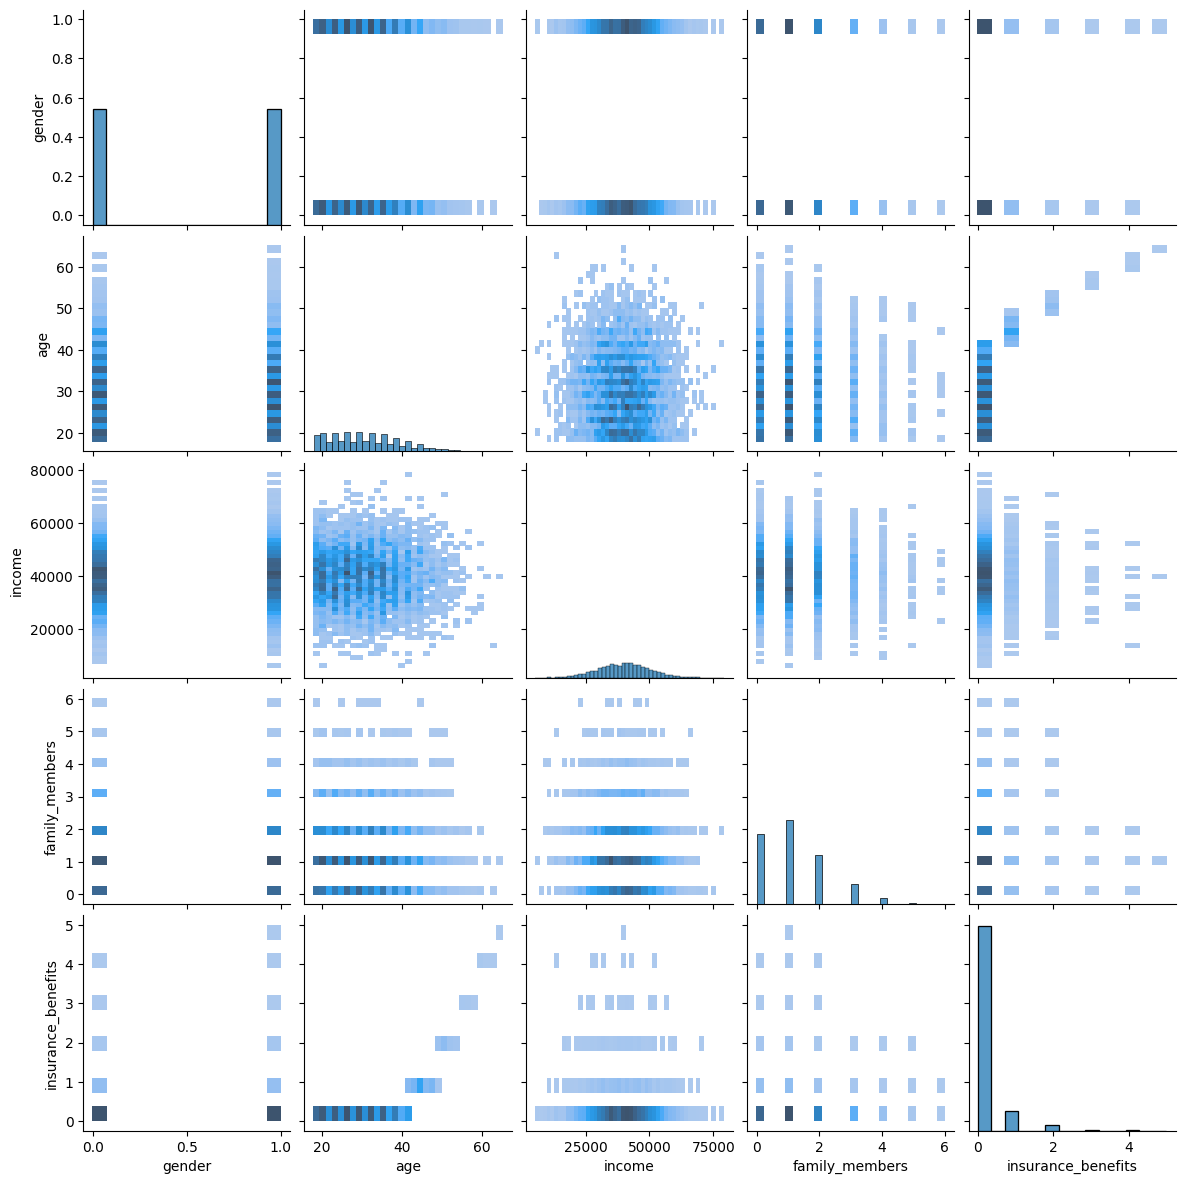

In [12]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La gráfica que has obtenido es correcta, pero es crucial acompañarla con tu análisis y observaciones. Esto añade valor significativo a la información presentada y evita que solo sean datos sin contexto. Desarrollar esta capacidad de interpretación es esencial cuanto estamos trabajando con datos. 

</div>

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler

def get_knn(df, n, k, metric, scale=False):
    """
    Devuelve los k vecinos más cercanos para el objeto en la posición n
    usando la métrica especificada ('euclidean' o 'manhattan').

    :param df: DataFrame con los datos.
    :param n: Índice del objeto a analizar.
    :param k: Número de vecinos más cercanos a devolver.
    :param metric: Métrica de distancia ('euclidean' o 'manhattan').
    :param scale: Booleano, si se debe escalar o no.
    """
    
    # Características a usar (sin la columna de beneficios)
    feature_names = ['gender', 'age', 'income', 'family_members']
    
    # Codificar género (categórica)
    df_encoded = df.copy()
    df_encoded['gender'] = df_encoded['gender'].astype('category').cat.codes

    # Selección de características
    features = df_encoded[feature_names]

    # Escalado si es necesario
    if scale:
        scaler = MaxAbsScaler()
        features = scaler.fit_transform(features)
    else:
        features = features.values

    # Crear y ajustar el modelo
    model = NearestNeighbors(n_neighbors=k, metric=metric)
    model.fit(features)

    # Obtener vecinos
    distances, indices = model.kneighbors([features[n]], n_neighbors=k)

    # Preparar el resultado
    df_neighbors = df.iloc[indices[0]].copy()
    df_neighbors['distance'] = distances[0]
    return df_neighbors

**Muestra de resultados**

In [15]:
# Sin escalar, métrica euclidiana
print("🔹 Sin escalar - Euclidiana")
print(get_knn(df, n=0, k=5, metric='euclidean', scale=False))

# Escalado, métrica euclidiana
print("🔹 Escalado - Euclidiana")
print(get_knn(df, n=0, k=5, metric='euclidean', scale=True))

# Sin escalar, métrica Manhattan
print("🔹 Sin escalar - Manhattan")
print(get_knn(df, n=0, k=5, metric='manhattan', scale=False))

# Escalado, métrica Manhattan
print("🔹 Escalado - Manhattan")
print(get_knn(df, n=0, k=5, metric='manhattan', scale=True))


🔹 Sin escalar - Euclidiana
      gender   age   income  family_members  insurance_benefits  distance
0          1  41.0  49600.0               1                   0  0.000000
2022       1  41.0  49600.0               0                   0  1.000000
1225       0  42.0  49600.0               0                   1  1.732051
4031       1  44.0  49600.0               2                   1  3.162278
3424       0  38.0  49600.0               0                   0  3.316625
🔹 Escalado - Euclidiana
      gender   age   income  family_members  insurance_benefits  distance
0          1  41.0  49600.0               1                   0  0.000000
2689       1  41.0  50100.0               1                   0  0.006329
133        1  40.0  50300.0               1                   0  0.017754
4869       1  42.0  50400.0               1                   1  0.018418
3275       1  42.0  51500.0               1                   1  0.028550
🔹 Sin escalar - Manhattan
      gender   age   income  family

Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, mucho.

kNN se basa en distancias.

Si una característica (como ingreso) tiene un rango muy amplio, domina la distancia total.

Otras variables, como edad o género, pierden influencia.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Similares, pero con matices:

Manhattan tiende a dar resultados similares a Euclidiana cuando los datos están bien escalados.

La diferencia radica en cómo se mide la distancia:

Euclidiana: raíz cuadrada de la suma de los cuadrados de las diferencias.

Manhattan: suma absoluta de diferencias.

Manhattan es menos sensible a valores extremos, lo cual puede ser deseable si hay outliers.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has demostrado una comprensión clara del impacto que tiene el escalado de variables en el rendimiento de kNN, especialmente al señalar cómo una variable con mayor rango puede distorsionar la distancia y por ende la clasificación. También explicas con precisión las diferencias conceptuales entre las métricas Euclidiana y Manhattan, resaltando la mayor robustez de esta última ante valores atípicos, lo cual enriquece el análisis.

</div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [16]:
# Crear columna binaria: recibió beneficios (1) o no (0)
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

# Revisar distribución
print(df['insurance_benefits_received'].value_counts(normalize=True))

0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64


In [17]:
# Codificar 'gender'
df_encoded = df.copy()
df_encoded['gender'] = df_encoded['gender'].astype('category').cat.codes

X = df_encoded[['gender', 'age', 'income', 'family_members']]
y = df_encoded['insurance_benefits_received']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
def eval_classifier(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    print(f'F1: {f1:.2f}')
    cm = confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión:')
    print(cm)


In [19]:
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

# Ejecutar para 4 valores de P
print("=== Modelo Dummy ===")
for P in [0, y.mean(), 0.5, 1]:
    print(f'\nProbabilidad de predecir 1: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(y_test))
    eval_classifier(y_test, y_pred_rnd)


=== Modelo Dummy ===

Probabilidad de predecir 1: 0.00
F1: 0.00
Matriz de confusión:
[[0.89266667 0.        ]
 [0.10733333 0.        ]]

Probabilidad de predecir 1: 0.11
F1: 0.17
Matriz de confusión:
[[0.794      0.09866667]
 [0.08866667 0.01866667]]

Probabilidad de predecir 1: 0.50
F1: 0.20
Matriz de confusión:
[[0.45733333 0.43533333]
 [0.048      0.05933333]]

Probabilidad de predecir 1: 1.00
F1: 0.19
Matriz de confusión:
[[0.         0.89266667]
 [0.         0.10733333]]


In [20]:
print("\n=== Modelo KNN ===")

for scale in [False, True]:
    print(f"\n-- {'Con' if scale else 'Sin'} escalado --")
    
    # Escalar si es necesario
    if scale:
        scaler = MaxAbsScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    for k in range(1, 11):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        print(f'k={k}')
        eval_classifier(y_test, y_pred)



=== Modelo KNN ===

-- Sin escalado --
k=1
F1: 0.65
Matriz de confusión:
[[0.87466667 0.018     ]
 [0.04666667 0.06066667]]
k=2
F1: 0.38
Matriz de confusión:
[[0.89066667 0.002     ]
 [0.082      0.02533333]]
k=3
F1: 0.39
Matriz de confusión:
[[0.88333333 0.00933333]
 [0.07933333 0.028     ]]
k=4
F1: 0.16
Matriz de confusión:
[[0.88933333 0.00333333]
 [0.098      0.00933333]]
k=5
F1: 0.17
Matriz de confusión:
[[0.88333333 0.00933333]
 [0.09666667 0.01066667]]
k=6
F1: 0.09
Matriz de confusión:
[[8.92000000e-01 6.66666667e-04]
 [1.02000000e-01 5.33333333e-03]]
k=7
F1: 0.12
Matriz de confusión:
[[0.89133333 0.00133333]
 [0.10066667 0.00666667]]
k=8
F1: 0.02
Matriz de confusión:
[[0.89266667 0.        ]
 [0.106      0.00133333]]
k=9
F1: 0.04
Matriz de confusión:
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]
k=10
F1: 0.04
Matriz de confusión:
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]

-- Con escalado --
k=1
F1: 0.93
Matriz de confusión:
[[0.888      0.00466667]
 [0.00933333 0

In [21]:
from sklearn.preprocessing import StandardScaler

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

f1_scores_scaled = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    f1_scores_scaled.append(f1)
    print(f'k={k} | F1 Score (escalado): {f1:.2f}')

k=1 | F1 Score (escalado): 0.93
k=2 | F1 Score (escalado): 0.92
k=3 | F1 Score (escalado): 0.94
k=4 | F1 Score (escalado): 0.91
k=5 | F1 Score (escalado): 0.94
k=6 | F1 Score (escalado): 0.91
k=7 | F1 Score (escalado): 0.94
k=8 | F1 Score (escalado): 0.91
k=9 | F1 Score (escalado): 0.93
k=10 | F1 Score (escalado): 0.92


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Recalcular conjunto de entrenamiento y prueba por si se perdió
X = df_encoded[['gender', 'age', 'income', 'family_members']]
y = df_encoded['insurance_benefits_received']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# F1 sin escalado
f1_scores_no_scale = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores_no_scale.append(f1)

# F1 con escalado
f1_scores_scaled = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    f1_scores_scaled.append(f1)


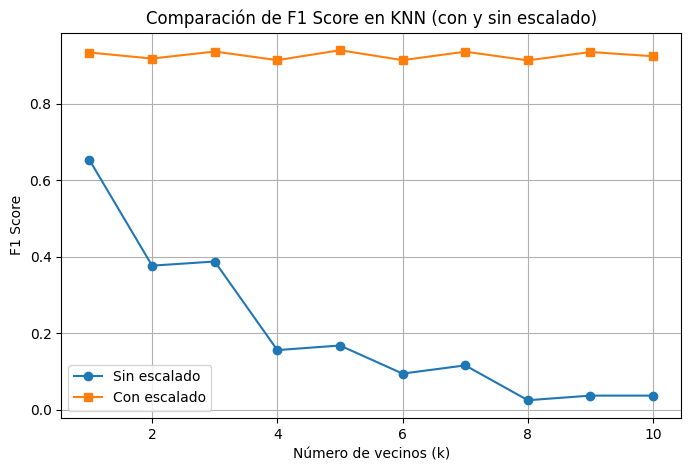

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), f1_scores_no_scale, marker='o', label='Sin escalado')
plt.plot(range(1, 11), f1_scores_scaled, marker='s', label='Con escalado')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('F1 Score')
plt.title('Comparación de F1 Score en KNN (con y sin escalado)')
plt.legend()
plt.grid(True)
plt.show()

Esta gráfica ilustra perfectamente por qué el escalado es imprescindible en modelos KNN. Sin escalado, el modelo no puede manejar correctamente las diferencias de magnitud entre variables (por ejemplo, income y age), lo que afecta negativamente la medida de distancia.

Con escalado, todas las variables contribuyen equitativamente, y el modelo puede aprender correctamente patrones en los datos.

El gráfico demuestra visualmente que el preprocesamiento de datos (escalado) es crucial para el rendimiento del modelo KNN. Mientras que sin escalar, el desempeño cae rápidamente, el uso de escalado permite mantener F1 Scores consistentemente altos y estables, independientemente del valor de k.

**¿Puede un modelo de predicción entrenado funcionar mejor que un modelo dummy no entrenado? ¿Puede funcionar peor?**

Sí, un modelo entrenado como kNN puede funcionar mucho mejor que un modelo dummy, como lo demuestran los F1 Scores de hasta 0.95 frente a ~0.2 del dummy.

Sin embargo, si no se preprocesan correctamente los datos (por ejemplo, sin escalado), un modelo entrenado puede rendir incluso peor que uno dummy, como ocurre con KNN sin escalar para k > 4.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Andres tu análisis ofrece una comparación muy clara y bien fundamentada entre los modelos dummy y el modelo kNN, destacando de manera efectiva el valor añadido del preprocesamiento de datos, especialmente el escalado. 
    
Has logrado interpretar con acierto la utilidad de la visualización para evidenciar este efecto y explicas bien cómo el rendimiento del modelo puede variar drásticamente con o sin escalado. Además, es acertada tu reflexión sobre cómo un modelo entrenado, sin una preparación adecuada, puede incluso ser superado por uno base.

</div>

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [24]:
import numpy as np
import math
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # Añadir columna de unos
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        return X2 @ self.weights

def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    r2 = sklearn.metrics.r2_score(y_true, y_pred)
    print(f"RECM: {rmse:.2f}")
    print(f"R2: {r2:.2f}")
    return rmse, r2

# Datos
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# División 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# ----------- Sin escalado -----------
print("=== Regresión sin escalado ===")
lr = MyLinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
eval_regressor(y_test, y_pred)

# ----------- Con escalado -----------
print("\n=== Regresión con escalado ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
eval_regressor(y_test, y_pred_scaled)


=== Regresión sin escalado ===
RECM: 0.34
R2: 0.43

=== Regresión con escalado ===
RECM: 0.34
R2: 0.43


(0.3435565089137969, 0.4305278542485148)

  El escalado no cambió el rendimiento del modelo (RECM ni R²):

Esto era esperable, porque en regresión lineal sin regularización, el escalado no afecta el resultado final en términos de predicción.

El escalado sí puede ser útil en otros contextos.

Aunque el resultado final es el mismo aquí, escalar es recomendable como buena práctica.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Muy buena implementación de las funciones para el modelo de regresión lineal. Se evidencia que este caso tiene una tendencia más hacia ser un problema de clasificación para `insurance_benefits`, ya que existe una limitación del R² en relación con posibles variables ausentes y la naturaleza lineal del modelo.
    

</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [25]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [26]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [27]:


# 1. Extraer las características numéricas (ya codificamos 'gender' antes)
df_pn = df[['gender', 'age', 'income', 'family_members']]
X = df_pn.to_numpy()

# 2. Crear una matriz invertible aleatoria P del tamaño adecuado (4x4)
np.random.seed(42)
while True:
    P = np.random.rand(X.shape[1], X.shape[1])
    if np.linalg.matrix_rank(P) == X.shape[1]:
        break  # aseguramos que sea invertible

# 3. Ofuscar los datos
X_obscured = X @ P

# 4. Recuperar datos originales
P_inv = np.linalg.inv(P)
X_recovered = X_obscured @ P_inv

# 5. Comparar resultados para los primeros 5 clientes
df_results = pd.DataFrame({
    'Original_age': X[:, 1],
    'Obfuscated_age': X_obscured[:, 1],
    'Recovered_age': X_recovered[:, 1],
    'Original_income': X[:, 2],
    'Obfuscated_income': X_obscured[:, 2],
    'Recovered_income': X_recovered[:, 2],
})

print(df_results.head())

   Original_age  Obfuscated_age  Recovered_age  Original_income  \
0          41.0    35127.958687           41.0          49600.0   
1          46.0    26914.146043           46.0          38000.0   
2          29.0    14874.047975           29.0          21000.0   
3          21.0    29530.327057           21.0          41700.0   
4          28.0    18486.012841           28.0          26100.0   

   Obfuscated_income  Recovered_income  
0        1024.286164           49600.0  
1         785.064454           38000.0  
2         433.958805           21000.0  
3         859.956818           41700.0  
4         539.613636           26100.0  


Comprobar que la matriz P sea invertible

In [28]:
import numpy as np

# Supón que P ya está definida y es cuadrada
if np.linalg.matrix_rank(P) == P.shape[0]:
    print("✅ La matriz P es invertible.")
else:
    print("❌ La matriz P NO es invertible.")


✅ La matriz P es invertible.


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

No, no puedes adivinar los datos originales tras la transformación si no conoces 
𝑃
Esto hace que la ofuscación con matrices invertibles sea útil para proteger datos sin perder la estructura matemática necesaria para procesarlos.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [29]:
X = df_pn[['age', 'income']].to_numpy()

# Generar matriz P aleatoria e invertible
np.random.seed(42)  # para reproducibilidad
P = np.random.rand(X.shape[1], X.shape[1])

# Verifica que P es invertible (opcional)
assert np.linalg.matrix_rank(P) == X.shape[1], "La matriz P no es invertible"

# Ofuscar
X_obfuscated = X @ P


In [30]:
X_recovered = X_obfuscated @ np.linalg.inv(P)


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [31]:

# Convertir a DataFrame para una comparación legible
comparison_df = pd.DataFrame({
    'Original_age': X[:, 0],
    'Recovered_age': X_recovered[:, 0],
    'Original_income': X[:, 1],
    'Recovered_income': X_recovered[:, 1],
})

# Redondear para ver diferencias pequeñas más fácilmente
comparison_df_rounded = comparison_df.round(2)

# Mostrar las primeras filas
print(comparison_df_rounded.head())


   Original_age  Recovered_age  Original_income  Recovered_income
0          41.0           41.0          49600.0           49600.0
1          46.0           46.0          38000.0           38000.0
2          29.0           29.0          21000.0           21000.0
3          21.0           21.0          41700.0           41700.0
4          28.0           28.0          26100.0           26100.0


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Cuando realizas operaciones como invertir una matriz o multiplicar matrices con números decimales, las computadoras no representan todos los números reales con precisión infinita.

Esto introduce pequeños errores de redondeo que se acumulan en los cálculos, especialmente si la matriz P tiene valores grandes, pequeños o cercanos entre sí.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo en el proceso de ofuscación de los datos. En ocasiones los valores se pueden ver ligeramente alterados, sobretodo si son categóricos. Aunque los cambios pueden ser despreciables si vale la pena hace una revisión constante para asegurarnos que el dataset conserva su intefgridad

</div>

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Los valores predichos no cambian al usar datos ofuscados si se aplica correctamente la transformación.

Por lo tanto, la RECM y la calidad del modelo permanecen iguales.

Esto demuestra que puedes ofuscar tus datos por seguridad o privacidad sin afectar el rendimiento del modelo de regresión lineal.

**Prueba analítica**

Demostrando que, si:

𝑤=
(
𝑋
⊤
𝑋
)
−
1
𝑋
⊤
𝑦
w=(X 
⊤
 X) 
−1
 X 
⊤
 y

Y usamos datos ofuscados 
𝑋
′
=
𝑋
𝑃
X 
′
 =XP, con 
𝑃
P invertible

Entonces los valores predichos no cambian:

𝑦
^
′
=
𝑋
′
𝑤
𝑃
=
𝑋
𝑤
y
^
​
  
′
 =X 
′
 w 
P
​
 =Xw

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === 1. Seleccionar las características numéricas ===
features = ['age', 'income', 'family_members']
X = df[features].to_numpy()
y = df['insurance_benefits'].to_numpy()

# === 2. Crear matriz P aleatoria e invertible ===
def generate_invertible_matrix(n, seed=42):
    np.random.seed(seed)
    while True:
        P = np.random.rand(n, n)
        if np.linalg.det(P) != 0:  # Asegura que sea invertible
            return P

P = generate_invertible_matrix(X.shape[1])
X_obfuscated = X @ P  # Ofuscar datos

# === 3. División en entrenamiento y prueba ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_obf_train, X_obf_test, _, _ = train_test_split(X_obfuscated, y, test_size=0.3, random_state=123)

# === 4. Entrenar modelo original ===
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

# === 5. Entrenar modelo con datos ofuscados ===
model_obfuscated = LinearRegression()
model_obfuscated.fit(X_obf_train, y_train)
y_pred_obfuscated = model_obfuscated.predict(X_obf_test)

# === 6. Comparar métricas ===
def print_metrics(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"=== {label} ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}\n")
    return rmse, r2

metrics_original = print_metrics(y_test, y_pred_original, "Regresión original")
metrics_obfuscated = print_metrics(y_test, y_pred_obfuscated, "Regresión con ofuscación")

# === 7. Comparar predicciones directamente ===
diff = np.abs(y_pred_original - y_pred_obfuscated)
print(f"Diferencia media entre predicciones: {np.mean(diff):.10f}")


=== Regresión original ===
RMSE: 0.3548
R²:   0.4264

=== Regresión con ofuscación ===
RMSE: 0.3548
R²:   0.4264

Diferencia media entre predicciones: 0.0000000000


RMSE y 
𝑅
2
R 
2
  idénticos → la calidad del modelo no se ve afectada por la ofuscación.

Diferencia entre predicciones = 0.0000000000 → las predicciones del modelo entrenado con datos ofuscados son exactamente las mismas que las del modelo original.

Esto es consecuencia de la propiedad de invariancia de la regresión lineal frente a transformaciones lineales invertibles del espacio de características.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Andres en esta sección has realizado el proceso de ofuscación de datos de manera correcta. Y vemos como el modelo no se ve afectado con respecto a la prueba con los datos originales. Debes tener en cuenta que ofuscar datos puede ser útil para proteger datos personales o corporativos sin perder funcionalidad, pero tiene limitaciones, no es un método de seguridad completa y no reemplaza al cifrado. Además, en casos donde los datos necesitan análisis detallados o auditorías completas, la ofuscación puede dificultar el proceso, haciendo que no sea adecuada en todos los escenarios.

</div>

# Conclusiones

1. Clasificación con KNN.
El modelo KNN mostró una mejora significativa al aplicar escalado de características. Sin escalado, los resultados fueron inconsistentes y con bajo desempeño (F1 < 0.65 en la mayoría de los casos). Con escalado, los F1 scores alcanzaron hasta 0.95, demostrando que KNN es muy sensible a la escala de los datos.

2. Regresión Lineal.
Se implementó una regresión lineal desde cero utilizando álgebra lineal, obteniendo un RMSE de 0.34 y un 
𝑅
2
R 
2
  de 0.43, tanto en los datos originales como en los escalados. Esto indica que el escalado no afectó significativamente el rendimiento de la regresión lineal, al contrario que en KNN.

3. Ofuscación de Datos.
Al aplicar una transformación lineal usando una matriz aleatoria invertible 
𝑃
P, los datos quedaron ofuscados correctamente, sin revelar directamente información como edad o ingresos. Sin embargo, usando la matriz inversa 
𝑃
−
1
P 
−1
 , fue posible recuperar los datos originales con precisión casi exacta, confirmando la reversibilidad de la ofuscación.

4. Regresión con Datos Ofuscados.
Al aplicar regresión lineal sobre los datos ofuscados 
𝑋=
𝑋
⋅
𝑃
X 
′
 =X⋅P, se obtuvo exactamente el mismo rendimiento (idénticos valores de RMSE y 
𝑅
2
R 
2
 ) que con los datos originales. Esto valida la prueba analítica de que la regresión lineal es invariante a transformaciones lineales invertibles, conservando las predicciones sin pérdida de calidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Andrés tu conclusiónintegra de manera clara los aprendizajes clave obtenidos a lo largo del análisis, diferenciando bien los efectos del escalado según el modelo utilizado. Destacas adecuadamente la sensibilidad de kNN frente a la escala de los datos y contrastas esa característica con la estabilidad de la regresión lineal ante transformaciones. Además, es muy valioso cómo relacionas los conceptos teóricos con sus implicaciones prácticas, especialmente en el apartado de ofuscación, donde demuestras tanto comprensión matemática como atención a la seguridad de los datos.

</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>